In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
#matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [127]:
#example
simple_train = ['call you tonight', 'Call me a cab', 'Please call me...PLEASE!']

In [128]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn .feature_extraction.text import CountVectorizer

vect = CountVectorizer()
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)
# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [129]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [130]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [131]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [132]:
print(type(simple_train_dtm))
print(simple_train_dtm)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [133]:
simple_test = ["please don't call me"]

In [134]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [135]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


In [136]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
print(sms)

        v1                                                 v2 Unnamed: 2   
0      ham  Go until jurong point, crazy.. Available only ...        NaN  \
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [137]:
sms = sms.dropna(how="any", axis=1)
sms.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [138]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [139]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [140]:
sms['label_in_num'] = sms.label.map({'ham': 0, 'spam': 1})
sms.head()

,label,message,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [141]:
sms['length_of_msg'] = sms.message.apply(len)
sms.head()

,label,message,label_in_num,length_of_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

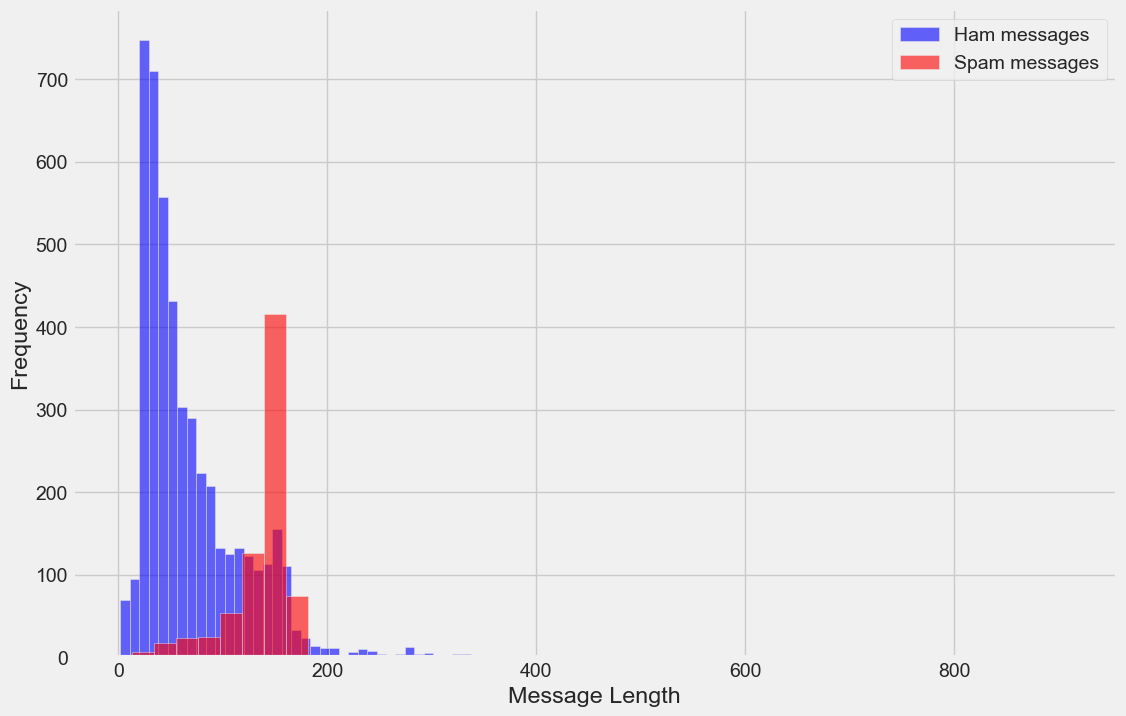

In [142]:
plt.figure(figsize=(12, 8))
sms[sms.label == 'ham'].length_of_msg.plot(bins=100, kind='hist', color='blue', label="Ham messages", alpha=0.6)
sms[sms.label == 'spam'].length_of_msg.plot(kind='hist', color='red', label="Spam messages", alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [143]:
sms[sms.label == 'ham'].describe()

,label_in_num,length_of_msg
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [144]:
sms[sms.label == 'spam'].describe()

,label_in_num,length_of_msg
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [145]:
sms[sms.length_of_msg == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [146]:
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def text_process(message):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    nopunctuatuion = [char for char in message if char not in string.punctuation]
    nopunctuatuion = ''.join(nopunctuatuion)
    return ' '.join([word for word in nopunctuatuion.split() if word.lower() not in STOPWORDS])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BIJAY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [147]:
sms.head()

,label,message,label_in_num,length_of_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [148]:
sms['clean_msg'] = sms.message.apply(text_process)
sms.head()

,label,message,label_in_num,length_of_msg,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [149]:
type(stopwords.words('english'))

list

In [150]:
from collections import Counter

words = sms[sms.label == 'ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))


[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [151]:
words = sms[sms.label == 'spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))


[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [152]:
from sklearn.model_selection import train_test_split

X = sms.clean_msg
Y = sms.label_in_num

print(X.shape)
print(Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(5572,)
(4457,)
(1115,)
(4457,)
(1115,)


In [153]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer()
vect.fit(X_train)

X_train_dtm = vect.transform(X_train)
#X_train_dtm = vect.fit_transform(X_train)  #same as above 2 line

print(type(X_train_dtm), X_train_dtm.shape)

X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)


<class 'scipy.sparse._csr.csr_matrix'> (4457, 8312)
<class 'scipy.sparse._csr.csr_matrix'> (1115, 8312)


In [154]:
from sklearn.feature_extraction.text import  TfidfTransformer

tfidfTransformer = TfidfTransformer()
tfidfTransformer.fit(X_train_dtm)
tfidfTransformer.transform(X_train_dtm)

<4457x8312 sparse matrix of type '<class 'numpy.float64'>'
	with 37133 stored elements in Compressed Sparse Row format>

In [155]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()


In [156]:
%time nb.fit(X_train_dtm, Y_train)

CPU times: total: 0 ns
Wall time: 4.48 ms


MultinomialNB()

In [157]:
from sklearn import metrics

y_pred_class = nb.predict(X_test_dtm)

print("-------------------Accuracy------------------")
print(metrics.accuracy_score(Y_test, y_pred_class))

print("-------------------Confusion Matrix---------------")
print(metrics.confusion_matrix(Y_test, y_pred_class))

-------------------Accuracy------------------
0.9865470852017937
-------------------Confusion Matrix---------------
[[970   6]
 [  9 130]]


In [158]:
#False Positive
X_test[(y_pred_class == 1) & (Y_test == 0)]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
Name: clean_msg, dtype: object

In [159]:
#False Negative
X_test[(y_pred_class == 0) & (Y_test == 1)]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
Name: clean_msg, dtype: object

In [160]:
#example of False Neagtive
X_test[4949]

'Hi probably much fun get message thought id txt cos bored james farting night'

In [161]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.13921228e-02, 3.66345052e-04, 6.20389471e-04, ...,
       5.05754351e-07, 1.47422375e-02, 7.00776575e-07])

In [162]:
metrics.roc_auc_score(Y_test, y_pred_prob)

0.9802379407949051

In [163]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('bow', CountVectorizer()),
    ('tfid', TfidfTransformer()),
    ('model', MultinomialNB())
])

pipe.fit(X_train, Y_train)
y_pred = pipe.predict(X_test)

print("-------------------Accuracy Score---------------")
print(metrics.accuracy_score(Y_test, y_pred))

print("-------------------Confusion Matrix---------------")
print(metrics.confusion_matrix(Y_test, y_pred))

-------------------Accuracy Score---------------
0.9721973094170404
-------------------Confusion Matrix---------------
[[976   0]
 [ 31 108]]


In [164]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="liblinear")

%time logreg.fit(X_train_dtm, Y_train)


CPU times: total: 0 ns
Wall time: 13.3 ms


LogisticRegression(solver='liblinear')

In [165]:
y_pred_class = logreg.predict(X_test_dtm)

y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01647605, 0.01370316, 0.07251639, ..., 0.01934857, 0.01640912,
       0.00523078])

In [166]:
print("-------------------Accuracy Score----------------")
print(metrics.accuracy_score(Y_test, y_pred_class))

print("------------------Confusion Matrix----------------")
print(metrics.confusion_matrix(Y_test, y_pred_class))

print("------------------ROC AUC Score-------------------")
print(metrics.roc_auc_score(Y_test, y_pred_prob))



-------------------Accuracy Score----------------
0.9874439461883409
------------------Confusion Matrix----------------
[[976   0]
 [ 14 125]]
------------------ROC AUC Score-------------------
0.9835033612454298


In [168]:
# Function to predict user input
def predict_spam(message):
    prediction = pipe.predict([message])
    return 'Spam' if prediction[0] == 1 else 'Not a Spam'

# Example usage with user input
user_input = "Rofl. Its true to its name"
print(f"Message: {user_input}")
print(f"Prediction: {predict_spam(user_input)}")


Message: Rofl. Its true to its name
Prediction: Not a Spam
